In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
covid = pd.read_csv('who_covid19.csv')

In [4]:
covid

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
1,United States of America,Americas,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
2,India,South-East Asia,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
3,Brazil,Americas,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
4,Russian Federation,Europe,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0


In [5]:
covid.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
1,United States of America,Americas,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
2,India,South-East Asia,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
3,Brazil,Americas,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
4,Russian Federation,Europe,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794


In [6]:
covid.tail()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
233,Saint Helena,Africa,0,0.0,0,0.0,0,0,0.0,0,0.0,0
234,Tokelau,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
235,Tonga,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
236,Turkmenistan,Europe,0,0.0,0,0.0,0,0,0.0,0,0.0,0
237,Tuvalu,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0


In [12]:
categorical_data = covid.select_dtypes(include='object')
categorical_data.head(6)

,Name,WHO Region
0,Global,NaN
1,United States of America,Americas
2,India,South-East Asia
3,Brazil,Americas
4,Russian Federation,Europe
5,France,Europe


In [10]:
continuos_data = covid.select_dtypes(exclude='object')
continuos_data.head(6)

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
1,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
2,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
3,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
4,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794
5,5953274,9153.340000,139817,214.970000,25080,110746,170.280000,180,0.280000,26


In [15]:
def boxplot(covid):
    for i in covid.columns:
        plt.boxplot(covid[i])
        plt.title(i)
        plt.show(i)

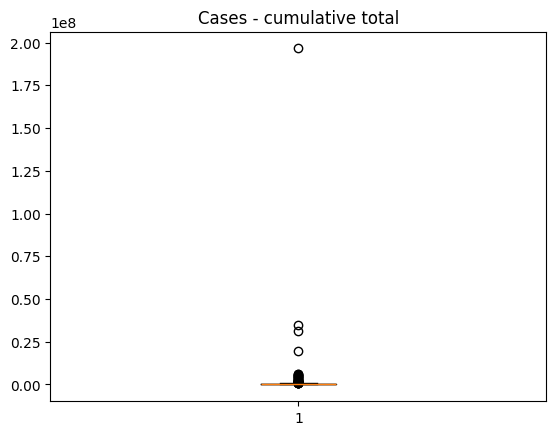

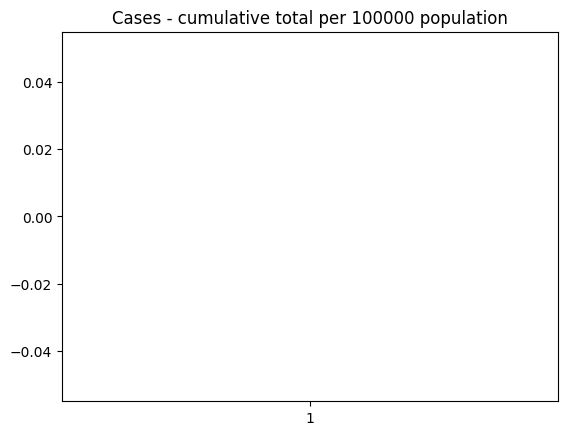

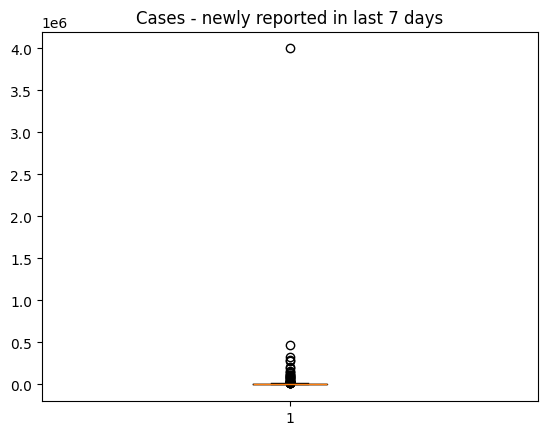

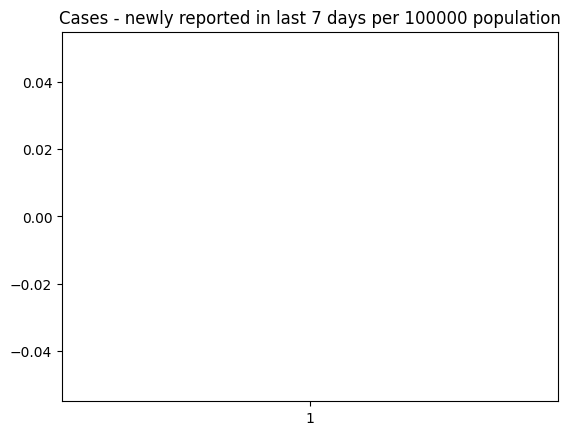

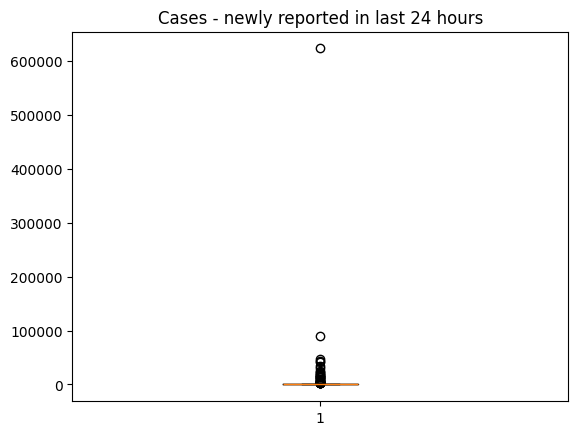

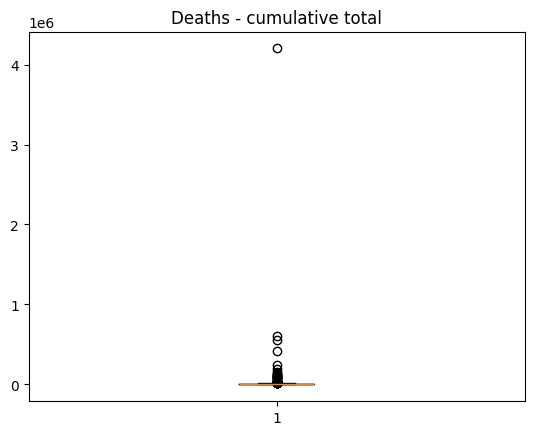

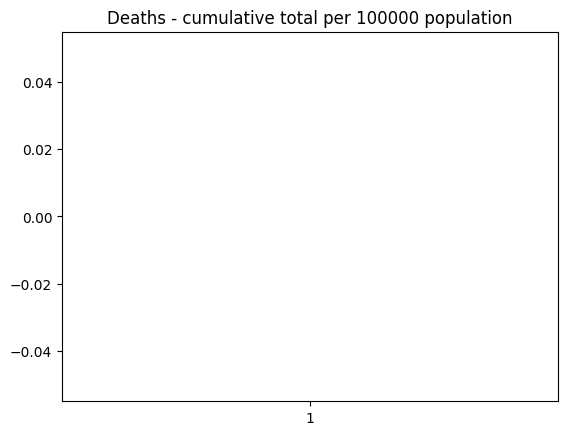

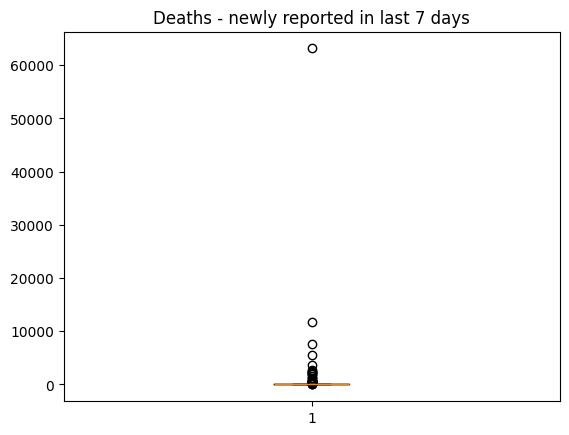

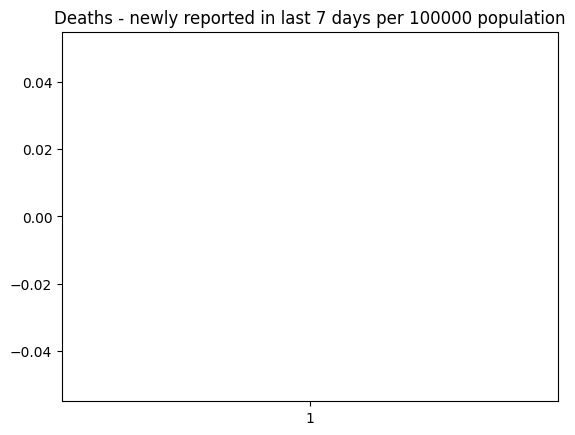

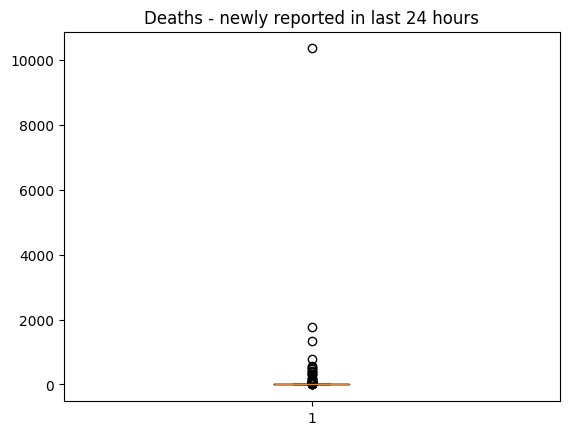

In [16]:
boxplot(continuos_data)

In [17]:
def removing_outliers(covid):
    for i in covid.columns:
        
        q1 = covid[i].quantile(0.25)
        q3 = covid[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr
        covid[i]   = np.where(covid[i]>upper_limit,upper_limit,covid[i])
        covid[i]   = np.where(covid[i]<lower_limit,lower_limit,covid[i])

In [18]:
removing_outliers(continuos_data)

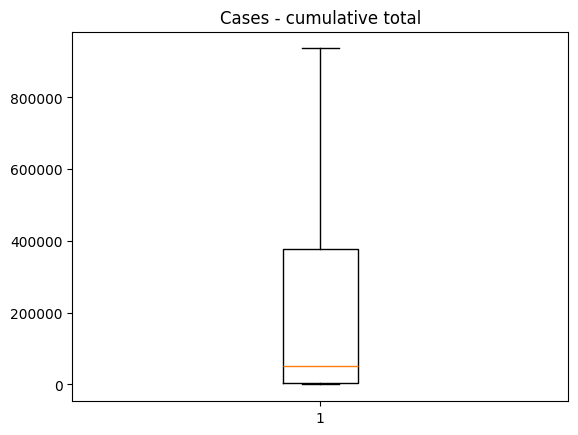

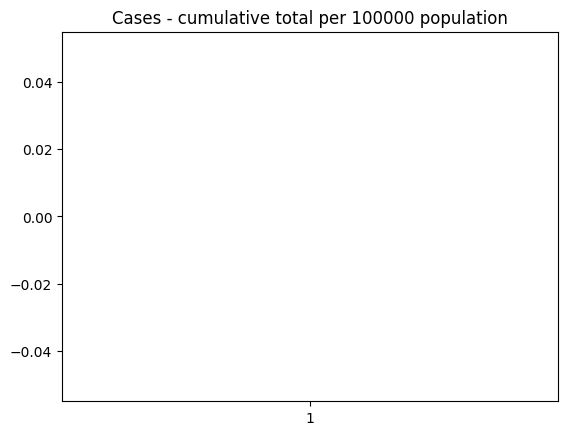

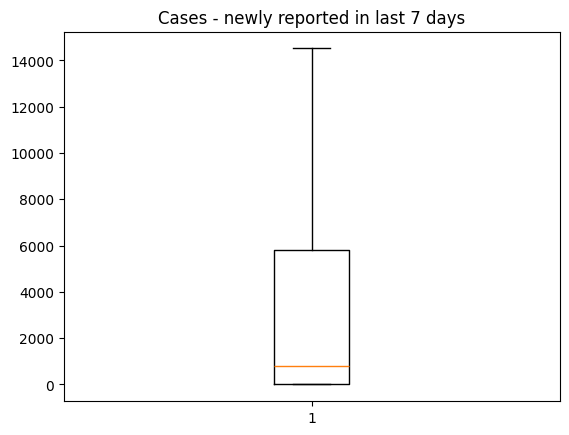

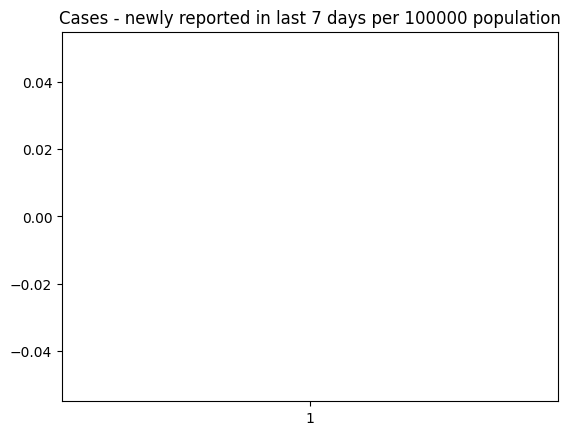

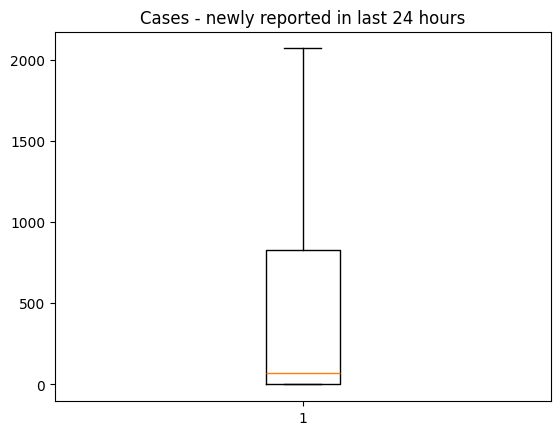

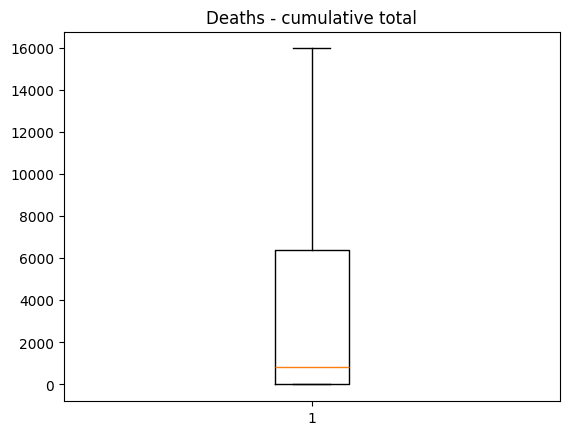

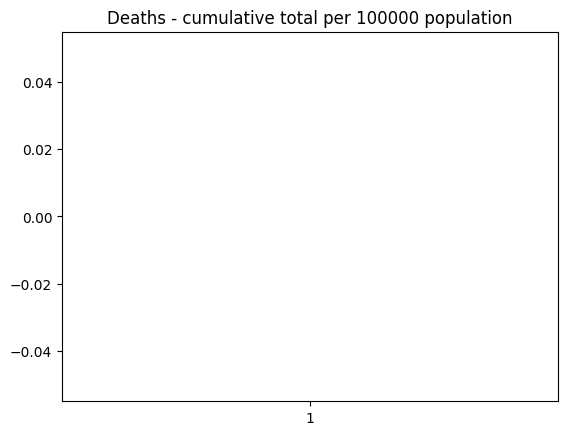

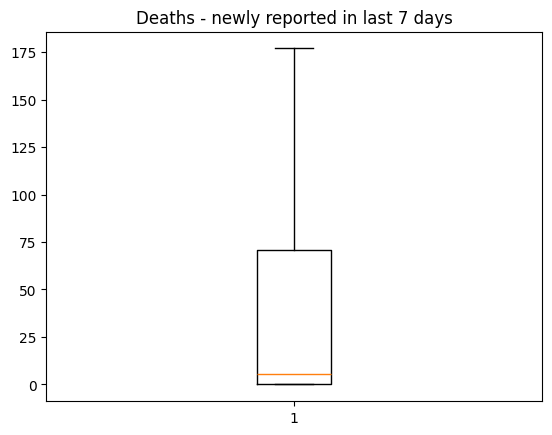

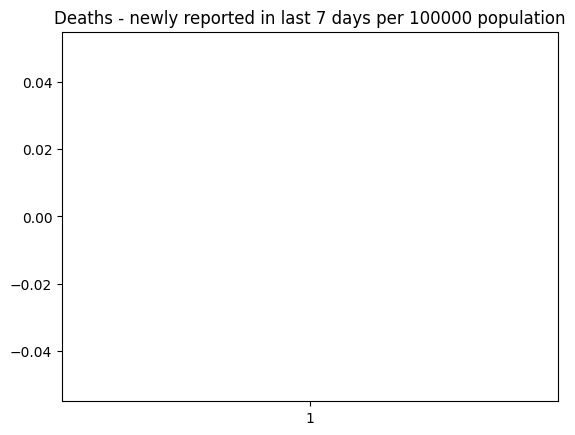

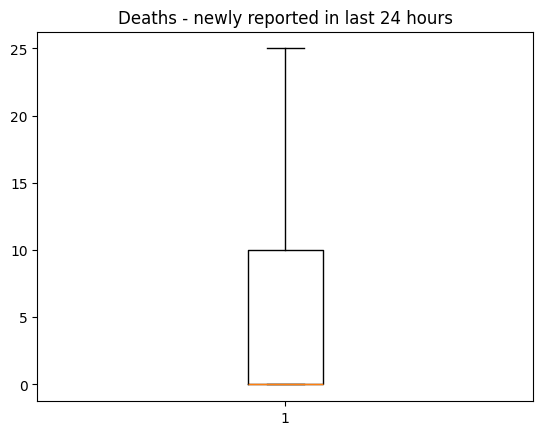

In [19]:
boxplot(continuos_data)